<a href="https://colab.research.google.com/github/Abhirex15/COVID-19/blob/master/Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
#from statsmodels.tsa.api import Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("covid_19_data.csv")

In [ ]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
df.shape

(18327, 8)

In [ ]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [ ]:
#checking if there any null values in the datset
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [ ]:
df.drop(['SNo'],1,inplace=True)

In [ ]:
df.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
#let's group the cases in different dates
df_datewise = df.groupby(['ObservationDate']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})


In [ ]:
print(df_datewise["Confirmed"].iloc[-1],"|||",
df_datewise["Recovered"].iloc[-1],"|||",
df_datewise["Deaths"].iloc[-1])

2811193.0 ||| 793601.0 ||| 197159.0


In [ ]:
print("Total Active Cases")
print(df_datewise["Confirmed"].iloc[-1]-df_datewise["Recovered"].iloc[-1]-
df_datewise["Deaths"].iloc[-1])

Total Active Cases
1820433.0


In [ ]:
print("Total Closed Cases")
print(df_datewise["Recovered"].iloc[-1]+
df_datewise["Deaths"].iloc[-1])

Total Closed Cases
990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

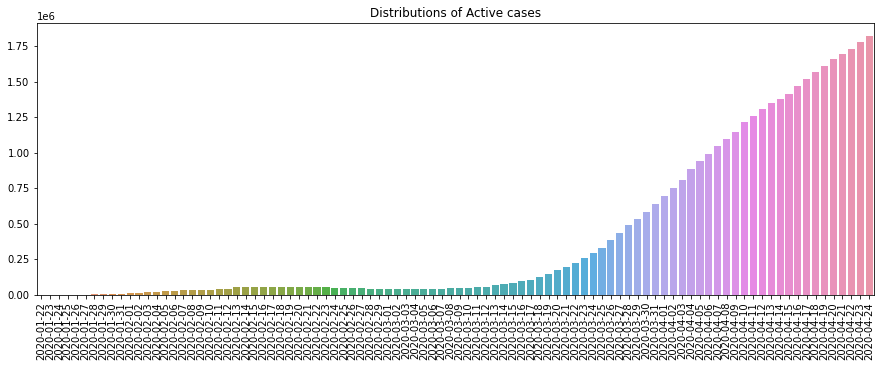

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_datewise.index.date, y=df_datewise["Confirmed"]-df_datewise["Recovered"]-
df_datewise["Deaths"])
plt.title("Distributions of Active cases")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

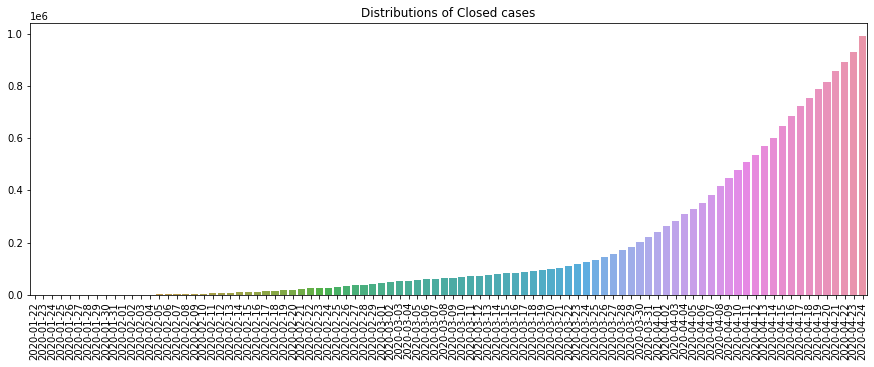

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_datewise.index.date, y=df_datewise["Recovered"]+
df_datewise["Deaths"])
plt.title("Distributions of Closed cases")
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Weekly progress of different types of Cases')

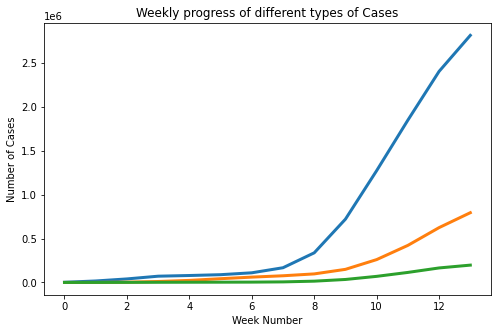

In [ ]:
#Lets do it in weekwise
df_datewise["Week of Year"] = df_datewise.index.weekofyear
week_number = []
weekwise_confirmed = []
weekwise_deaths = []
weekwise_recovered = []
w = 1
for i in list(df_datewise['Week of Year'].unique()):
    weekwise_confirmed.append(df_datewise[df_datewise["Week of Year"] == i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(df_datewise[df_datewise["Week of Year"] == i]["Recovered"].iloc[-1])
    weekwise_deaths.append(df_datewise[df_datewise["Week of Year"] == i]["Deaths"].iloc[-1])
    week_number.append(w)
    w = w + 1
    
plt.figure(figsize=(8,5))
plt.plot(weekwise_confirmed,linewidth=3)
plt.plot(weekwise_recovered,linewidth=3)
plt.plot(weekwise_deaths,linewidth=3)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly progress of different types of Cases")



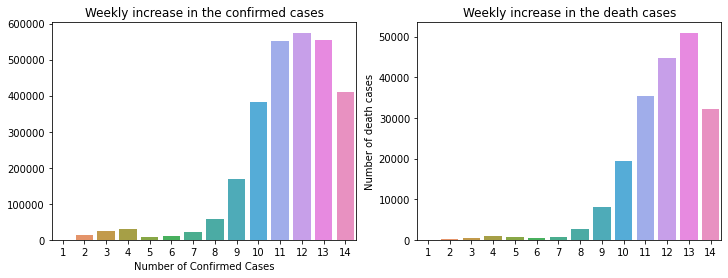

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
#diff() will give the discrete difference of individual values.
sns.barplot(x=week_number,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_number,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_ylabel("Week Number")
ax1.set_xlabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of death cases")
ax1.set_title("Weekly increase in the confirmed cases")
ax2.set_title("Weekly increase in the death cases")
plt.show()

In [ ]:
print("Average increase of confirmed cases:",np.round(df_datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase of recovered cases:",np.round(df_datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase of death cases:",np.round(df_datewise["Deaths"].diff().fillna(0).mean()))

Average increase of confirmed cases: 29900.0
Average increase of recovered cases: 8442.0
Average increase of death cases: 2097.0


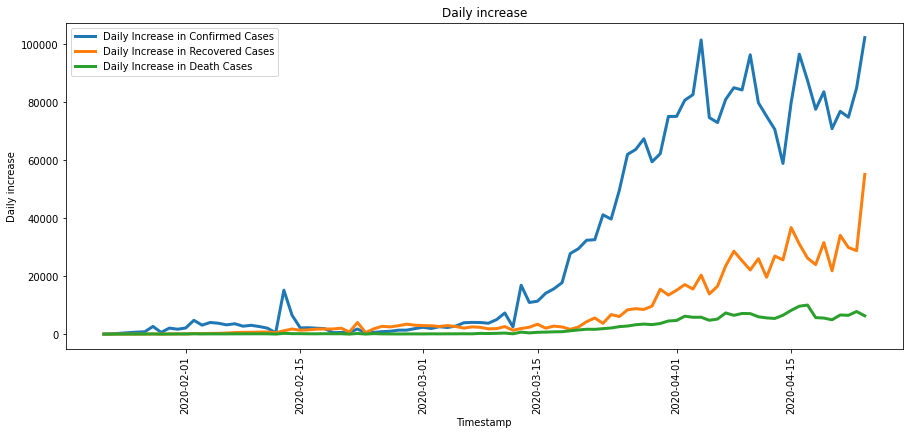

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(df_datewise["Confirmed"].diff().fillna(0),label="Daily Increase in Confirmed Cases",linewidth=3)

plt.plot(df_datewise["Recovered"].diff().fillna(0),label="Daily Increase in Recovered Cases",linewidth=3)

plt.plot(df_datewise["Deaths"].diff().fillna(0),label="Daily Increase in Death Cases",linewidth=3)

plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Country wise analysis
#Country wise mortality rate

countrywise = df[df["ObservationDate"]==df["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["mortality"] = (countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["recovered"] = (countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 10 countries of death cases')

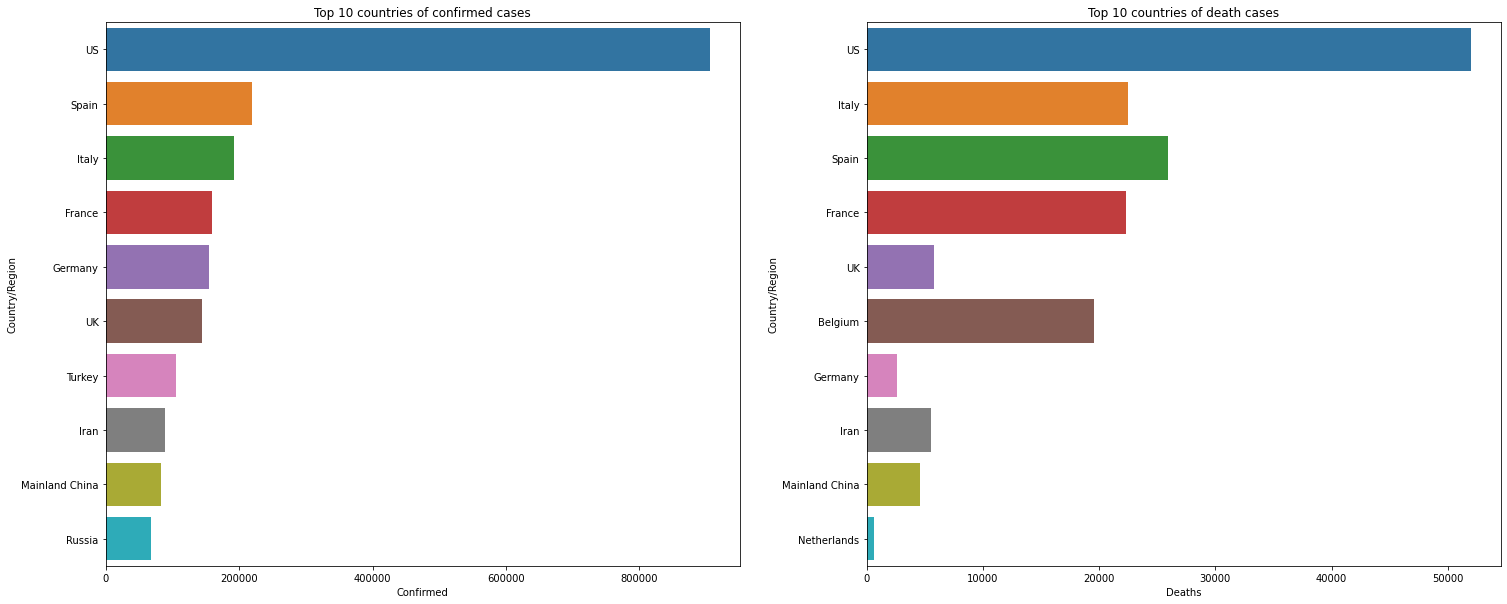

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_10_confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(10)
top_10_deaths = countrywise.sort_values(["Deaths"],ascending=False).head(10)

sns.barplot(x=top_10_confirmed["Confirmed"],y=top_10_confirmed.index,ax=ax1)
sns.barplot(x=top_10_confirmed["Deaths"],y=top_10_deaths.index,ax=ax2)
ax1.set_title("Top 10 countries of confirmed cases")
ax2.set_title("Top 10 countries of death cases")

In [ ]:
#Now Data Analysis for INDIA

india_data = df[df["Country/Region"]=="India"]
india_datewise = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(india_datewise.iloc[-1])

print("Total Active Cases in India")
print(india_datewise["Confirmed"].iloc[-1]-india_datewise["Recovered"].iloc[-1]-
india_datewise["Deaths"].iloc[-1])
print("Total Closes Cases in India")
print(india_datewise["Recovered"].iloc[-1]+
india_datewise["Deaths"].iloc[-1])


Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases in India
18252.0
Total Closes Cases in India
6278.0


In [ ]:
#Data Analysis for US

us_data = df[df["Country/Region"]=="US"]
us_datewise = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(us_datewise.iloc[-1])

print("Total Active Cases in US")
print(us_datewise["Confirmed"].iloc[-1]-us_datewise["Recovered"].iloc[-1]-
us_datewise["Deaths"].iloc[-1])
print("Total Closes Cases in US")
print(us_datewise["Recovered"].iloc[-1]+
us_datewise["Deaths"].iloc[-1])


Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases in US
754305.0
Total Closes Cases in US
151028.0


Text(0.5, 1.0, 'Weekly progress of different types of Cases in INDIA')

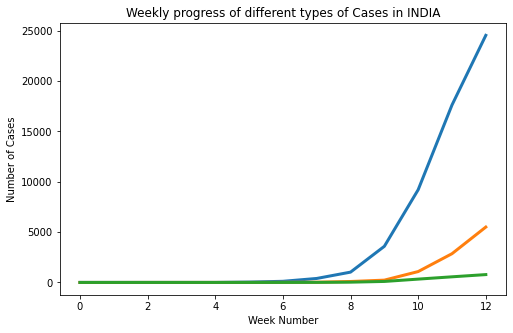

In [ ]:
#Lets do it in weekwise for INDIA

india_datewise["Week of Year"] = india_datewise.index.weekofyear
india_week_number = []
india_weekwise_confirmed = []
india_weekwise_deaths = []
india_weekwise_recovered = []
india_w = 1
for i in list(india_datewise['Week of Year'].unique()):
    india_weekwise_confirmed.append(india_datewise[india_datewise["Week of Year"] == i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(india_datewise[india_datewise["Week of Year"] == i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(india_datewise[india_datewise["Week of Year"] == i]["Deaths"].iloc[-1])
    india_week_number.append(w)
    india_w = india_w + 1
    
plt.figure(figsize=(8,5))
plt.plot(india_weekwise_confirmed,linewidth=3)
plt.plot(india_weekwise_recovered,linewidth=3)
plt.plot(india_weekwise_deaths,linewidth=3)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly progress of different types of Cases in INDIA")



In [ ]:
max_ind = india_datewise["Confirmed"].max()
china_data = df[df["Country/Region"]=="Mainland China"]
italy_data = df[df["Country/Region"]=="Italy"]
spain_data = df[df["Country/Region"]=="Spain"]

china_datewise = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
italy_datewise = italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
spain_datewise = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

print("It took",india_datewise[india_datewise["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"confirmed cases")
print("It took",italy_datewise[(italy_datewise["Confirmed"]>0) & (italy_datewise["Confirmed"]<=max_ind)].shape[0],"in Italy to reach the confirmed cases")
print("It took",us_datewise[(us_datewise["Confirmed"]>0) & (us_datewise["Confirmed"]<=max_ind)].shape[0],"in US to reach the confirmed cases")   
print("It took",spain_datewise[(spain_datewise["Confirmed"]>0) & (spain_datewise["Confirmed"]<=max_ind)].shape[0],"in Italy to reach the confirmed cases")                            
print("It took",china_datewise[(china_datewise["Confirmed"]>0) & (china_datewise["Confirmed"]<=max_ind)].shape[0],"in Italy to reach the confirmed cases")                               

It took 86 days in India to reach 24530.0 confirmed cases
It took 44 in Italy to reach the confirmed cases
It took 59 in US to reach the confirmed cases
It took 49 in Italy to reach the confirmed cases
It took 14 in Italy to reach the confirmed cases


In [ ]:
df_datewise["Days Since"] = df_datewise.index-df_datewise.index[0]
df_datewise["Days Since"] = df_datewise["Days Since"].dt.days

train = df_datewise.iloc[:int(df_datewise.shape[0]*0.95)]
test = df_datewise.iloc[:int(df_datewise.shape[0]*0.95):]

model_scores = []

In [ ]:
 #reg = LinearRegression().fit(train, test)

In [ ]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train['Days Since']).reshape(-1,1),np.array(train["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train['Days Since']).reshape(-1,1),np.array(train["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred_test_lin_reg = lin_reg.predict(np.array(test['Days Since']).reshape(-1,1))
pred_test_svm = svm.predict(np.array(test['Days Since']).reshape(-1,1))

In [ ]:
new_date = []
new_pred_lr = []
new_pred_svm = []
for i in range(1,18):
  new_date.append(df_datewise.index[-1]+timedelta(days=i))
  new_pred_lr.append(lin_reg.predict(np.array(df_datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_pred_svm.append(svm.predict(np.array(df_datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%f'%x)
model_pred = pd.DataFrame(zip(new_date,new_pred_lr,new_pred_svm),columns=["Dates","LR","SVR"])
model_pred.head(10)  



,Dates,LR,SVR
0,2020-04-25,1560528.581035,3322585.504228
1,2020-04-26,1582218.776251,3500761.275228
2,2020-04-27,1603908.971467,3686599.219424
3,2020-04-28,1625599.166684,3880343.847022
4,2020-04-29,1647289.361900,4082244.815529
5,2020-04-30,1668979.557116,4292556.983370
6,2020-05-01,1690669.752332,4511540.463507
7,2020-05-02,1712359.947549,4739460.677057
8,2020-05-03,1734050.142765,4976588.406909
9,2020-05-04,1755740.337981,5223199.851339


In [ ]:
model_train = df_datewise.iloc[:int(df_datewise.shape[0]*0.85)]
valid = df_datewise.iloc[int(df_datewise.shape[0]*0.85)]

In [ ]:
from statsmodels.tsa.api import Holt

In [ ]:
holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"] = holt.forecast(len(valid))


In [ ]:
holt_new_date = []
holt_new_pred = []
for i in range(1,18):
  holt_new_date.append(df_datewise.index[-1]+timedelta(days=i))
  holt_new_pred.append(holt.forecast((len(valid)+1))[-1])

model_pred["Holt prediction"]=holt_new_pred

model_pred.head(5) 


,Dates,LR,SVR,Holt new linear prediction,Holt prediction
0,2020-04-25,1560528.581035,3322585.504228,2068685.550544,2068685.550544
1,2020-04-26,1582218.776251,3500761.275228,2068685.550544,2068685.550544
2,2020-04-27,1603908.971467,3686599.219424,2068685.550544,2068685.550544
3,2020-04-28,1625599.166684,3880343.847022,2068685.550544,2068685.550544
4,2020-04-29,1647289.361900,4082244.815529,2068685.550544,2068685.550544


In [ ]:
model_pred.drop(['Holt new linear prediction'], axis=1).head(5)

,Dates,LR,SVR,Holt prediction
0,2020-04-25,1560528.581035,3322585.504228,2068685.550544
1,2020-04-26,1582218.776251,3500761.275228,2068685.550544
2,2020-04-27,1603908.971467,3686599.219424,2068685.550544
3,2020-04-28,1625599.166684,3880343.847022,2068685.550544
4,2020-04-29,1647289.361900,4082244.815529,2068685.550544
